In [1]:
%matplotlib inline
import numpy as np
from IPython.core.display import HTML
HTML('<link href="https://fonts.googleapis.com/css?family=Cabin|Quicksand" rel="stylesheet"><style>.container{width:90% !important; font-family: "Cabin", sans-serif;}em{color: red !important;}</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

In [2]:
from sympy import init_printing 
from sympy import Matrix
init_printing(use_latex=True)
def out(mat, n=2): return Matrix(np.round(mat, decimals=n))

# Matrix decomposition

- **Summary:** we have seen how we can merge multiple linear transformations via matrix multiplication into a single linear transformation which we can equivalently represent as a matrix.

- **Question:** How can we do the inverse operation? 
<br>How can we take a single linear transformation/matrix and write it as the result of the multiplication of other (simpler) linear transformations/matrices?

- When a matrix can be written as the product of other matrices, we say that the matrix can be *factorised*

- There are many ways to factorise a matrix; we will now see one important and useful type of factorisation, called *eigendecomposition* or *spectral decomposition*

# Matrix eigenvalues

- a given linear transformation $T$ may seem complex
- one way to gain insight into how a transformation is acting is to find *characteristic lines*
<br> i.e. lines that are invariant sets under $T$


- if v is a non-zero vector such that $Tv$ is a scalar multiple of $v$
<br> that is $Tv = λv$ for some $λ$
  - then we say that the direction of $v$ is invariant under $T$
<br> $v$ is called a characteristic vector or *eigenvector*
  - the scalar $λ$ is called a characteristic value or *eigenvalue* of $T$

# Eigenvalues and eigenvectors

Formally:
- $A$ is a linear transformation from a vector space $V$ into itself <br>(this implies that we can represent it with a *square* matrix)
- $v$ is a column vector in $V$ <br>(that is **not** the zero vector)
- then $v$ is an *eigenvector* of $A$ if $A v$ is a scalar multiple of $v$, i.e.
$${\displaystyle A \mathbf {v} =\lambda \mathbf {v}}$$
- where $λ$ is a scalar known as the *eigenvalue*, characteristic value, or characteristic root associated with the eigenvector $v$

# Eigenvalues and eigenvectors intuition

- geometrically an eigenvector points in a direction that is "stretched" by the transformation
- the eigenvalue is the factor by which it is stretched
- if the eigenvalue is negative, the direction is reversed

![eig](img/eig.png)

# Eigenvalues and eigenvectors intuition

- this is a shear mapping
- the red arrow changes direction but the blue arrow does not
- the blue arrow is an eigenvector of this transformation because it doesn't change direction
- since its length is unchanged, its eigenvalue is 1
 
<center><img src="img/monna.png" width=500></center>

# Eigenvalues and eigenvectors intuition

<center><img src="img/eig.gif" alt="eig" width="600"/></center>

# Eigenvalues and eigenvectors intuition

- the transformation matrix A = ${\bigl [}{\begin{smallmatrix}2&1\\1&2\end{smallmatrix}}{\bigr ]}$ preserves the direction of vectors 
<br>parallel to $v_{1} = [1, −1]^T$ (in purple) and $v_{2} = [1, 1]^T$ (in blue)
- the vectors in red are not parallel to either eigenvector, so, their directions are changed by the transformation
- the blue vectors after the transformation are three times the length of the original (their eigenvalue is 3)
<br>while the lengths of the purple vectors are unchanged <br>(i.e. an eigenvalue of 1)

# Matrix eigenvalues

- To find an eigenvector or an eigenvalue, note that
$$Av = λv$$
$$Av-\lambda v = (A-\lambda \,{\text{I}})v=0$$
- where I is the identity matrix
- the matrix $(A-\lambda \,{\text{I}})$ has to have an *effect of magnitude* $0$ to compensate for a non null $v$
- this implies that $\det(A- \lambda \,{\text{I}})=0$

- the determinant is a polynomial in $\lambda$, and the eigenvalues are the zeros 
- note that they are not guaranteed to exist as real numbers (and may be complex numbers)


# Algebraic multiplicity

- if $λ_i$ is an eigenvalue of an $n \times n$ matrix $A$
- the algebraic multiplicity $μ_i$ of the eigenvalue $λ_i$ is its multiplicity as a root of the characteristic polynomial

$${\displaystyle \det(A-\lambda I)=(\lambda _{1}-\lambda )^{\mu _{1}}(\lambda _{2}-\lambda )^{\mu _{2}}\cdots (\lambda _{d}-\lambda )^{\mu _{d}}}$$

- The size of each eigenvalue's algebraic multiplicity is related to the dimension n of $A$ as

$${\displaystyle {\begin{aligned}1&\leq \mu _{i}\leq n,\\ &\sum _{i=1}^{d}{\mu _{i}}=n.\end{aligned}}}$$

# Algebraic multiplicity

- The notion of multiplicity opens the door to interesting questions: 
  - how are eigenvectors associated to eigenvalues with multiplicity > 1? 
  - the notion of *defective* matrices can be introduced, i.e. when a matrix does not have a complete basis of eigenvectors
- We will not investigate these issues, as these cases happens rarely in practice

# How to compute the eigendecomposition

- in a math oriented module we would invest time into the mechanics of the eigendecomposition computation 
- here we will not investigate how to compute the eigendecomposition
- rather we will develop intuitions on its properties and use

# In NumPy

`L,Q = numpy.linalg.eig(A)`

Compute the eigenvalues and eigenvectors of a square array

- A is the input square matrix
- L is a one dimensional array containing the eigenvalues, each repeated according to its multiplicity
- **Note:** 
  - the eigenvalues are not sorted 
  - the resulting array can be of complex type
- Q is an array containing the normalized (unit “length”) eigenvectors, such that the column `Q[:,i]` is the eigenvector corresponding to the eigenvalue `L[i]`

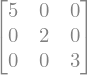

In [14]:
A=np.diag([5, 2, 3])
out(A)

In [15]:
L, Q = np.linalg.eig(A)
print(L.ndim)
L

1


array([5., 2., 3.])

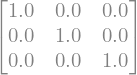

In [16]:
out(Q)

# Eigenvector properties


1. the trace of $A$ is the sum of all eigenvalues
$${\displaystyle \operatorname {tr} (A)=\sum _{i=1}^{n}A_{ii}=\sum _{i=1}^{n}\lambda _{i}=\lambda _{1}+\lambda _{2}+\cdots +\lambda _{n}}$$
2. the determinant of A is the product of all its eigenvalues
$${\displaystyle \det(A)=\prod _{i=1}^{n}\lambda _{i}=\lambda _{1}\lambda _{2}\cdots \lambda _{n}}$$
3. matrix A is invertible if and only if every eigenvalue is nonzero
4. if A is invertible, then the eigenvalues of $A^{−1}$ are $1/λ_1, 1/λ_2, ..., 1/λ_n$ and each eigenvalue's geometric multiplicity coincides

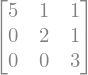

In [27]:
A = np.diag([5, 2, 3])
A[0,1:3]=1
A[1,2]=1
out(A)

In [28]:
print(np.linalg.det(A))
print(np.trace(A))

29.99999999999999
10


In [30]:
L, Q = np.linalg.eig(A)
print(L)
print(np.sum(L))
print(np.prod(L))

[5. 2. 3.]
10.0
30.0


# Note

- The statement "A can be eigendecomposed" does not imply that A has an inverse
- The statement "A has an inverse" does not imply that A can be eigendecomposed

A counterexample is 

$$\mathbf {A} ={\begin{pmatrix}-1&1\\0&1\end{pmatrix}}$$

which is an invertible defective matrix: i.e. there are eigenvalues with multiplicity greater than 1 and the corresponding eigenvectors are not linearly independent

# Diagonalization and the eigendecomposition

- suppose the eigenvectors of A form a basis
<br>i.e. A has n linearly independent eigenvectors $v_1, v_2, ..., v_n$ with associated eigenvalues $λ_1, λ_2, ..., λ_n$
- define a square matrix $Q$ whose columns are the n linearly independent eigenvectors of $A$

$${\displaystyle Q={\begin{bmatrix}v_{1}&v_{2}&\cdots &v_{n}\end{bmatrix}}}$$


# Diagonalization and the eigendecomposition


- since each column of $Q$ is an eigenvector of A, right multiplying A by $Q$ scales each column of $Q$ by its associated eigenvalue

$${\displaystyle AQ={\begin{bmatrix}\lambda _{1}v_{1}&\lambda _{2}v_{2}&\cdots &\lambda _{n}v_{n}\end{bmatrix}}}$$

- define a diagonal matrix $Λ$ where each diagonal element $Λ_{ii}$ is the eigenvalue associated with the $i$th column of $Q$
<br>then $${\displaystyle Q\Lambda={\begin{bmatrix}\lambda _{1}v_{1}&\lambda _{2}v_{2}&\cdots &\lambda _{n}v_{n}\end{bmatrix}}}$$

- so

$${\displaystyle AQ=Q\Lambda }$$


# Note: left and right multiplication of a diagonal matrix


- given a matrix $Q$ and a diagonal matrix $\Lambda$
- if we left multiply $\Lambda Q$ we multiply the rows of $Q$ by the scalars on the corresponding position
- if we right multiply $Q \Lambda$ we multiply the columns of $Q$ by the scalars on the corresponding position

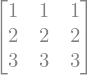

In [8]:
Q = np.mat([[1,1,1],[2,2,2],[3,3,3]])
out(Q)

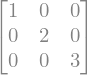

In [6]:
L = np.mat([[1,0,0],[0,2,0],[0,0,3]])
out(L)

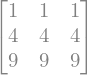

In [9]:
out(L*Q)

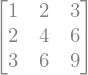

In [10]:
out(Q*L)

# Diagonalization and the eigendecomposition


- because the columns of $Q$ are linearly independent, $Q$ is invertible
- right multiplying both sides of the equation ${AQ=Q\Lambda }$ by $Q^{−1}$

$${\displaystyle A=Q\Lambda Q^{-1}}$$

- A can therefore be *decomposed* into a product of the following matrices:  
  - the matrix of its eigenvectors 
  - a diagonal matrix with its eigenvalues along the diagonal
  - and the inverse of the matrix of eigenvectors
- this is called the *eigendecomposition*

# Diagonalization and the eigendecomposition

- two $n \times n$ matrices are *similar* if they represent the same linear map under two (possibly) different bases
- two linear transformations $T, T'$ are similar iff $T'=PTP^{-1}$ where $P$ is the *change of basis* matrix between bases  
- when a matrix A is similar to a diagonal matrix then we say A is *diagonalizable* 
- operations like matrix multiplication, matrix inversion, and determinant calculation are simple on diagonal matrices



# Diagonalization and the eigendecomposition

- if A can be eigendecomposed, i.e, ${A=Q\Lambda Q^{-1}}$ then A is similar to the diagonal matrix $Λ$
- $Q$ is the *change of basis* matrix of the similarity transformation
- A and $Λ$ represent the same linear transformation expressed in two different bases
- the eigenvectors are used as the basis when representing the linear transformation as $Λ$




# Why diagonalization

- many operations on matrices are simple on diagonal matrices
- given
$${\displaystyle A=Q\Lambda Q^{-1}}$$


- inversion:
$${\displaystyle A^{-1}=Q \Lambda^{-1} Q^{-1}}$$
where the inverse of $\Lambda$ is just the inverse of each element of the diagonal 

# Why diagonalization

- many operations on matrices are simple on diagonal matrices
- given
$${\displaystyle A=Q\Lambda Q^{-1}}$$

- power:
$${\displaystyle A^2=Q\Lambda Q^{-1}Q\Lambda Q^{-1}=Q\Lambda I \Lambda Q^{-1}=Q\Lambda^2 Q^{-1}}$$

$${\displaystyle A^k=Q\Lambda^k Q^{-1}}$$

where the power of $\Lambda$ is just the power of each diagonal element